In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
import tensorflow as tf
tf.random.set_seed(200) #하이퍼파라미터 튜닝을 위해 실행시 마다 변수가 같은 초기값 가지게 하기
import numpy as np

In [2]:
df = pd.read_csv('CarSales.csv')
print(df.head())
print(df["VehicleType"].unique())

   CustomerID  Gender  Married  Age  Graduated  Profession  WorkExperience  \
0      458989  Female      1.0   36        1.0    Engineer             0.0   
1      458994    Male      1.0   37        1.0  Healthcare             8.0   
2      458996  Female      1.0   69        0.0    Engineer             0.0   
3      459000    Male      1.0   59        0.0   Executive            11.0   
4      459001  Female      0.0   19        0.0   Marketing             1.0   

  SpendingScore  FamilySize VehicleModel VehicleType  
0           Low         1.0       Casper     Compact  
1       Average         4.0      Santape     Midsize  
2           Low         1.0      Santape     Midsize  
3          High         2.0     Grandeur       Large  
4           Low         4.0       Casper     Compact  
['Compact' 'Midsize' 'Large' 'Small']


In [3]:
df["Gender"] = df["Gender"].map({'Female': 0, 'Male': 1})
df["Profession"] = df["Profession"].map({'Engineer' : 0, 'Healthcare' : 1, 'Executive' : 2, 'Marketing' : 3, 'Doctor' : 4, 'Artist' : 5, 'Lawyer' :6, 'Entertainment' :7, 'Homemaker': 8})
df["SpendingScore"] = df["SpendingScore"].map({'Low' : 0, 'Average' : 1 , 'High' : 2})
df["VehicleModel"].unique()
df["VehicleModel"] = df["VehicleModel"].map({'Casper':0, 'Santape' :1, 'Grandeur':2, 'Palisade':3,'i10':4, 'Tucson':5, 'Sonata':6, 'Kona' :7, 'Venue' :8 })

In [4]:
df["WorkExperience"].fillna(int(df["WorkExperience"].mean()), inplace=True)
df["FamilySize"].fillna(int(df["FamilySize"].mean()), inplace=True)
df = df.dropna()

In [5]:
##########데이터 전처리
x_data = df.drop(['CustomerID', 'VehicleType'], axis=1)
y_data = df[['VehicleType']]

In [6]:
# print(x_data.columns) 
# print(y_data.columns)

print(x_data.isnull().sum())
print(x_data.shape)
print(y_data.shape)

# transformer = MinMaxScaler()
# transformer.fit(x_data)
# x_data = transformer.transform(x_data)

Gender            0
Married           0
Age               0
Graduated         0
Profession        0
WorkExperience    0
SpendingScore     0
FamilySize        0
VehicleModel      0
dtype: int64
(2528, 9)
(2528, 1)


In [7]:
transformer = MinMaxScaler()
transformer.fit(x_data)
x_data = transformer.transform(x_data)

In [8]:
lb = LabelBinarizer()
lb.fit(y_data)
print(lb.classes_) #['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
#labels = lb.classes_
labels = ['Compact' 'Midsize' 'Large' 'Small']
y_data = lb.transform(y_data)

['Compact' 'Large' 'Midsize' 'Small']


In [9]:
print(x_data.shape) #(150, 4)
print(y_data.shape) #(150, 3)

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=200, stratify=y_data)

(2528, 9)
(2528, 4)


* Error 발생의 경우
- Found input variables with inconsistent numbers of samples 
- train test 데이터 분리 시 행 개수가 안맞아서 발생하는 오류

In [10]:
##########모델 생성

input = tf.keras.layers.Input(shape=[9])
net = tf.keras.layers.Dense(units=32, activation='relu')(input)
net = tf.keras.layers.Dense(units=32, activation='relu')(net)
net = tf.keras.layers.Dense(units=3, activation='softmax')(net)
model1 = tf.keras.models.Model(input, net)

# input = tf.keras.layers.Input(shape=(9,))
# net = tf.keras.layers.Dense(units=32, activation='relu')(input)
# net = tf.keras.layers.Dense(units=32, activation='relu')(net)
# net = tf.keras.layers.Dense(units=3, activation='softmax')(net)
# model2 = tf.keras.models.Model(input, net)

# input = tf.keras.layers.Input(shape=(9,))
# net = tf.keras.layers.Dense(units=32, activation='relu')(input)
# net = tf.keras.layers.Dense(units=32, activation='relu')(net)
# net = tf.keras.layers.Dense(units=3, activation='softmax')(net)
# model3 = tf.keras.models.Model(input, net)

2022-03-17 19:54:54.481097: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2022-03-17 19:54:54.481447: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


In [11]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

model = Sequential()

model.add(Dense(64,input_shape=(9,),activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(4,activation='softmax'))

model.compile(loss='categorical_crossentropy', 
              optimizer='Adam', 
              metrics=['accuracy'])

model.summary()

Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                640       
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 260       
Total params: 5,060
Trainable params: 5,060
Non-trainable params: 0
_________________________________________________________________


In [49]:
hist = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50)

Train on 1769 samples, validate on 759 samples
Epoch 1/5
1769/1769 [==============================] - 0s 109us/step - loss: 9.1243e-08 - accuracy: 1.0000 - val_loss: 8.6862e-07 - val_accuracy: 1.0000
Epoch 2/5
1769/1769 [==============================] - 0s 97us/step - loss: 8.9289e-08 - accuracy: 1.0000 - val_loss: 8.7725e-07 - val_accuracy: 1.0000
Epoch 3/5
1769/1769 [==============================] - 0s 176us/step - loss: 8.6122e-08 - accuracy: 1.0000 - val_loss: 8.4977e-07 - val_accuracy: 1.0000
Epoch 4/5
1769/1769 [==============================] - 0s 121us/step - loss: 8.3359e-08 - accuracy: 1.0000 - val_loss: 8.4505e-07 - val_accuracy: 1.0000
Epoch 5/5
1769/1769 [==============================] - 0s 105us/step - loss: 7.9585e-08 - accuracy: 1.0000 - val_loss: 8.5399e-07 - val_accuracy: 1.0000


In [32]:
hist.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

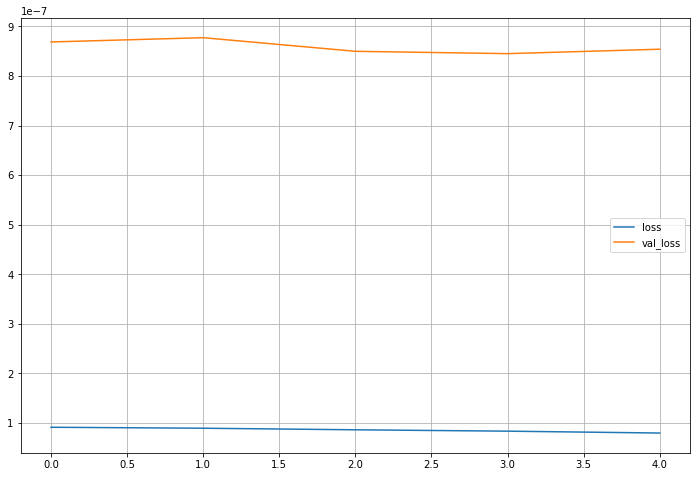

In [50]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12,8))
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])

plt.legend(['loss','val_loss'])
plt.grid()
plt.show()

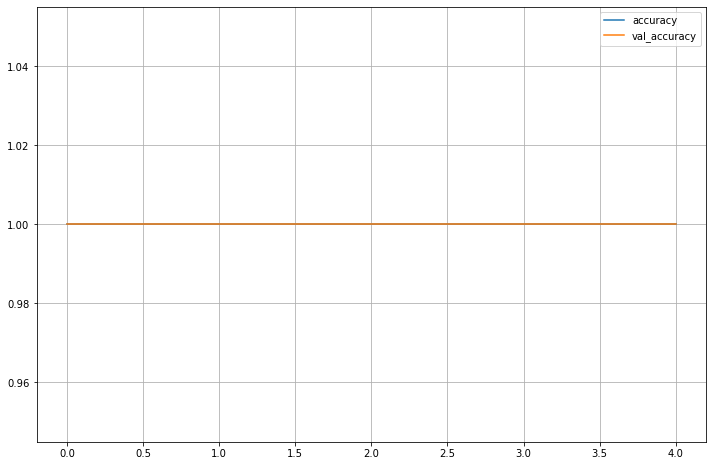

In [51]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12,8))

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.legend(['accuracy','val_accuracy'])
plt.grid()
plt.show()

In [14]:
loss, accuracy = model.evaluate(x_test, y_test)
print("Accuracy = {:.2f}".format(accuracy))

759/759 [==============================] - 0s 40us/step
Accuracy = 1.00


In [15]:
import numpy as np
from sklearn.metrics import classification_report,confusion_matrix

y_pred = model.predict(x_test)
y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       166
           1       1.00      1.00      1.00       282
           2       1.00      1.00      1.00       227
           3       1.00      1.00      1.00        84

    accuracy                           1.00       759
   macro avg       1.00      1.00      1.00       759
weighted avg       1.00      1.00      1.00       759

[[166   0   0   0]
 [  0 282   0   0]
 [  0   0 227   0]
 [  0   0   0  84]]


In [48]:
print(x_train[0])
print(df.head())

test_set = np.array([[1, 0, 0.04225352, 0, 0.125, 0, 0 , 0.125, 0.75]])
print("Predicted target name: {}".format(
    df["VehicleType"].unique()[model.predict_classes(test_set)]))

[1.         0.         0.04225352 0.         0.125      0.
 0.         0.125      0.75      ]
   CustomerID  Gender  Married  Age  Graduated  Profession  WorkExperience  \
0      458989       0      1.0   36        1.0         0.0             0.0   
1      458994       1      1.0   37        1.0         1.0             8.0   
2      458996       0      1.0   69        0.0         0.0             0.0   
3      459000       1      1.0   59        0.0         2.0            11.0   
4      459001       0      0.0   19        0.0         3.0             1.0   

   SpendingScore  FamilySize  VehicleModel VehicleType  
0              0         1.0             0     Compact  
1              1         4.0             1     Midsize  
2              0         1.0             1     Midsize  
3              2         2.0             2       Large  
4              0         4.0             0     Compact  
Predicted target name: ['Large']


In [17]:
from keras.models import load_model, save_model
import keras

keras.models.save_model(model, 'VehicleModel.model', overwrite=True, include_optimizer=True)


* h5 버전
    * h5py==2.10.0

In [26]:
model_test =keras.models.load_model('VehicleModel.model', custom_objects=None, compile=True)

result = df["VehicleType"].unique()[model.predict_classes(test_set)][0]
print(result)


Large
